# Deep Learning from Start to Finish with Keras

This notebook covers the basic Deep Learning with Keras.

### Steps Covered

1. Importing  a DataFrame
2. Cleanup and Transform the Data
3. Split Training and Test Sets
4. Train and optimize 
5. Prediction

### Background and Credits

I just completed very first course of Deep Learning Specialization at Coursera (more info here https://www.coursera.org/specializations/deep-learning) few weeks ago, and like to see how to apply what I learn to "actual work", this is my very first attempt using Keras for NN for Titanic prediction.

I have use andrefer the following projects/Books for my prediction:
1.  "Machine Learning from Start to Finish with Scikit-Learn" https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish
2. "Deep Learning with Python" from Manning, https://www.manning.com/books/deep-learning-with-python



### Step 1 Import the Dataframe
1. Import all necessary library 
2. Import the data, for both training_set, and testing_set
3. Split the dataset to X Input data set(i.e. 'Sex', 'Cabin', 'Fares and etc), and our Prediction-Y label, i.e. if a passenger Survived field
4. I decide to drop PassengerId, Name and Ticket fields, as I don't think our training model will benefits from these fields

In [1]:
import numpy as np
import pandas as pd

from keras import models
from keras import layers
from keras import optimizers
from keras import losses 
from keras import metrics

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
training_set = pd.read_csv('./data/train.csv')
testing_set = pd.read_csv('./data/test.csv')

x_train = training_set.drop(['PassengerId','Name','Ticket','Survived'], axis=1)
y_train = training_set['Survived']

x_test = testing_set.drop(['PassengerId','Name','Ticket'], axis=1)

In [5]:
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].mean())
x_test['Age'] = x_test['Age'].fillna(x_test['Age'].mean())

### Step 2 Cleanup and Transform the Data

Transform all categorial values into numeric value for both Training and Testing data set


In [6]:
def simplify_ages(df):
    #df['Age'] = df['Age'].fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df['Age'], bins, labels=group_names)
    df['Age'] = categories.cat.codes 
    return df

def simplify_cabins(df):
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
    df['Cabin'] =  pd.Categorical(df['Cabin'])
    df['Cabin'] = df['Cabin'].cat.codes 
    return df

def simplify_fares(df):
    df['Fare'] = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df['Fare'], bins, labels=group_names)
    df['Fare'] = categories.cat.codes 
    return df

def simplify_sex(df):
    df['Sex'] = pd.Categorical(df['Sex'])
    df['Sex'] = df['Sex'].cat.codes 
    return df

def simplify_embarked(df):
    df['Embarked'] = pd.Categorical(df['Embarked'])
    df['Embarked'] = df['Embarked'].cat.codes + 1
    return df

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = simplify_sex(df)
    df = simplify_embarked(df)
    return df


In [7]:
transform_features(x_train)
transform_features(x_test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,7,0,0,0,7,2
1,3,0,0,1,0,0,7,3
2,2,1,3,0,0,1,7,2
3,3,1,7,0,0,1,7,3
4,3,0,4,1,1,1,7,3
5,3,1,5,0,0,1,7,3
6,3,0,7,0,0,0,7,2
7,2,1,7,1,1,2,7,3
8,3,0,5,0,0,0,7,1
9,3,1,4,2,0,2,7,3


### Step 3 Build the NN model using Keras

 3 Layers, first 2 layers with 32 hidden value with "Relu" activation function
 Last layer with Sigmoid activation function

In [8]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', 
                       input_shape=(8,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
#model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

### Step 3.1 Split the training data set with validation set, and run the model

Default validation set size is 50

In [9]:
y_train = np.asarray(y_train)
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)

validation_size = 200

x_val = x_train[:validation_size]
partial_x_train = x_train[validation_size:]

y_val = y_train[:validation_size]
partial_y_train = y_train[validation_size:]

In [10]:
history = model.fit(partial_x_train, partial_y_train, epochs=30, validation_data=(x_val, y_val))

Train on 691 samples, validate on 200 samples
Epoch 1/30
691/691 [==============================] - 0s 450us/step - loss: 0.6894 - binary_accuracy: 0.5716 - val_loss: 0.6690 - val_binary_accuracy: 0.5700
Epoch 2/30
691/691 [==============================] - 0s 48us/step - loss: 0.6253 - binary_accuracy: 0.6556 - val_loss: 0.6673 - val_binary_accuracy: 0.5600
Epoch 3/30
691/691 [==============================] - 0s 54us/step - loss: 0.6059 - binary_accuracy: 0.6700 - val_loss: 0.6655 - val_binary_accuracy: 0.5450
Epoch 4/30
691/691 [==============================] - 0s 56us/step - loss: 0.5922 - binary_accuracy: 0.6802 - val_loss: 0.6465 - val_binary_accuracy: 0.5700
Epoch 5/30
691/691 [==============================] - 0s 49us/step - loss: 0.5745 - binary_accuracy: 0.6990 - val_loss: 0.6370 - val_binary_accuracy: 0.6300
Epoch 6/30
691/691 [==============================] - 0s 54us/step - loss: 0.5600 - binary_accuracy: 0.7149 - val_loss: 0.6227 - val_binary_accuracy: 0.6500
Epoch 7/30


#### Step 3.2 Plot accuracy and loss for both training and validation set, to check the model optimization level

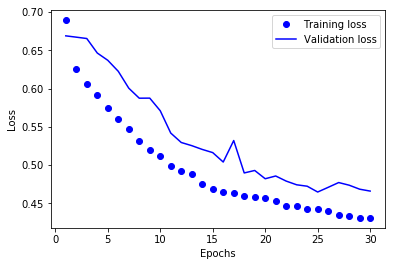

In [11]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

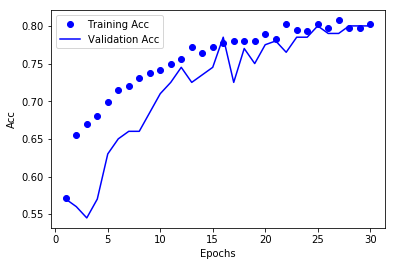

In [12]:
plt.clf()

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc,'b', label='Validation Acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.show()

### Step 4 Optimization

Repeat Step 3 multiple times till we find best model for this dataset. 
Example:

- Will adding more hidden units or additional hidden layer help? 
- what if I change my activation function? 
- increase/decrease my learning rate?
- Will increase number of Epochs help?

### Step 5 Predict the actual Test Data

In [13]:
predictions = model.predict_classes(x_test)
ids = testing_set['PassengerId'].copy()
new_output = ids.to_frame()
new_output["Survived"]=predictions
new_output.head(10)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [14]:
new_output.to_csv("my_submission.csv",index=False)